In [1]:
using DataFrames, CSV, DelimitedFiles, Plots, FFTW
include("/home/kirk/Documents/research/CHANDRATest/DJM.jl")

┌ Info: Recompiling stale cache file /home/kirk/.julia/compiled/v1.1/FFTW/PvIn2.ji for FFTW [7a1cc6ca-52ef-59f5-83cd-3a7055c09341]
└ @ Base loading.jl:1184


Main.DJM

In [2]:
pows12=CSV.read("cxc.fftinfo.all12")

,obsid,srcnum,startdate,exptime,ra,dec,freq,power
,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64
1,1026,26,51833.8,6458.48,19.9382,-73.4501,0.00123975,13.2664
2,1028,105,51856.5,6324.74,19.038,-73.414,0.000316292,13.824
3,1028,113,51856.5,6324.74,18.9547,-73.4035,0.00110873,31.303
4,1028,113,51856.5,6324.74,18.9547,-73.4035,0.00126712,12.1519
5,1028,38,51856.5,6324.74,19.8812,-73.5169,0.00110816,21.5887
6,1028,88,51856.5,6324.74,19.1853,-73.4323,0.000316454,12.6433
7,1029,13,52024.6,6120.26,19.6143,-73.4658,0.00115807,56.0898
8,1030,14,52025.6,6152.72,19.6181,-73.4675,0.00114639,74.6027
9,1030,14,52025.6,6152.72,19.6181,-73.4675,0.00212901,18.2923


In [3]:
test=DJM.createPowMatrix(pows12,0)
sums=zeros(length(test[1,1,2:end]))
for i in 1:length(test[1,1,2:end])
    sums[i]+=sum(test[:,:,i+1]) #i+1 becaus normal matrix is in 1st slice
end

216981 potential matches had the same obsid and were excluded.


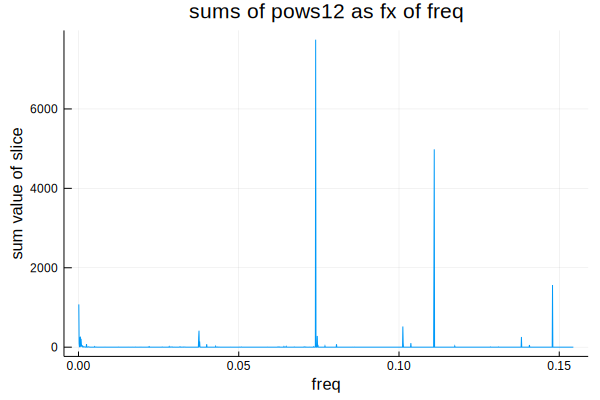

In [4]:
using Plots
df=0.0001
fbins=ceil(maximum(pows12.freq[:])/df)
frange=zeros(Int(fbins))
for i in 1:length(frange)
    frange[i]=i*df
end

plot(frange,sums,title="sums of pows12 as fx of freq",xlabel="freq",ylabel="sum value of slice",label="")

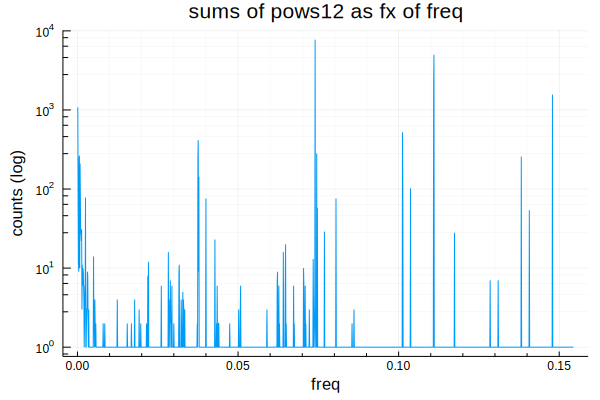

In [5]:
sums4log=zeros(length(sums))
for i in 1:length(sums4log)
    if sums[i]==0
        sums4log[i]=1
    else
        sums4log[i]=sums[i]
    end
end
plot(frange,sums4log,yaxis=:log,title="sums of pows12 as fx of freq",xlabel="freq",ylabel="counts (log)",label="",minorticks=true,minorgrid=true)

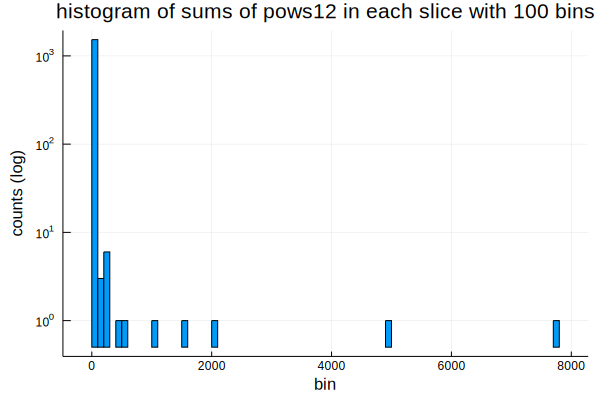

In [6]:
histogram(sums,bins=100,yaxis=:log,title="histogram of sums of pows12 in each slice with 100 bins",xlabel="bin",ylabel="counts (log)",label="")

In [7]:
function genFreqSums(powMatrix)
    sums=zeros(length(powMatrix[1,1,2:end]))
    for i in 1:length(powMatrix[1,1,2:end])
        sums[i]+=sum(powMatrix[:,:,i+1]) #i+1 becaus normal matrix is in 1st slice
    end
    return sums
end
function sumsLog(sums)
    sums4log=zeros(length(sums))
    for i in 1:length(sums4log)
        if sums[i]==0
            sums4log[i]=1
        else
            sums4log[i]=sums[i]
        end
    end
    return sums4log
end
function genFRange(df,powList)
    fbins=ceil(maximum(powList.freq[:])/df)
    frange=zeros(Int(fbins))
    for i in 1:length(frange)
        frange[i]=i*df
    end
    return frange
end


genFRange (generic function with 1 method)

In [8]:
pows8=CSV.read("cxc.fftinfo.all8")
pows8Matrix=DJM.createPowMatrix(pows8,0)
sums8=genFreqSums(pows8Matrix)
sums8Log=sumsLog(sums8)

1255743 potential matches had the same obsid and were excluded.


1546-element Array{Float64,1}:
 2268.0
  790.0
  187.0
  287.0
  630.0
 1030.0
  134.0
  466.0
  214.0
  222.0
  133.0
   55.0
  201.0
    ⋮  
    1.0
    1.0
    1.0
    2.0
    1.0
    1.0
    1.0
    1.0
    1.0
    1.0
    1.0
    1.0

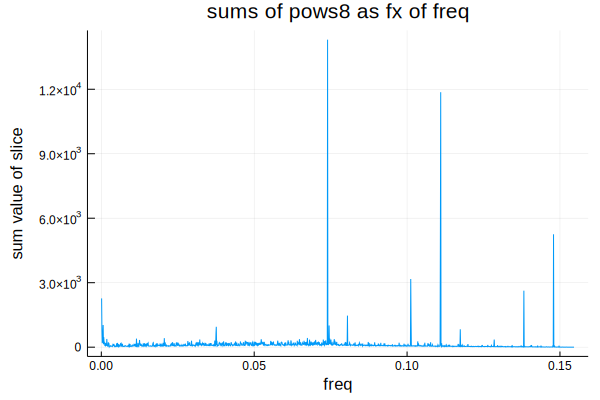

In [9]:
fRange8=genFRange(0.0001,pows8)
plot(fRange8,sums8,title="sums of pows8 as fx of freq",xlabel="freq",ylabel="sum value of slice",label="")

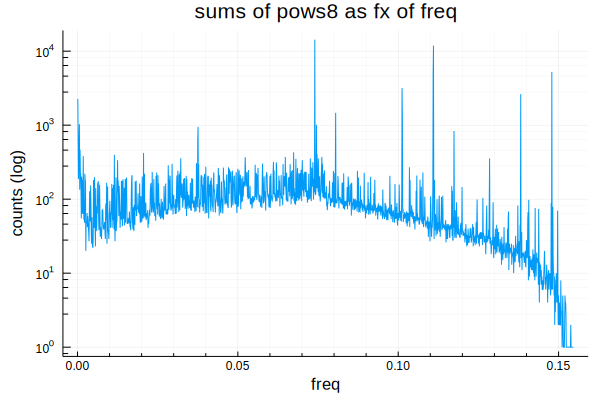

In [10]:
plot(fRange8,sums8Log,yaxis=:log,title="sums of pows8 as fx of freq",xlabel="freq",ylabel="counts (log)",label="",minorticks=true,minorgrid=true)

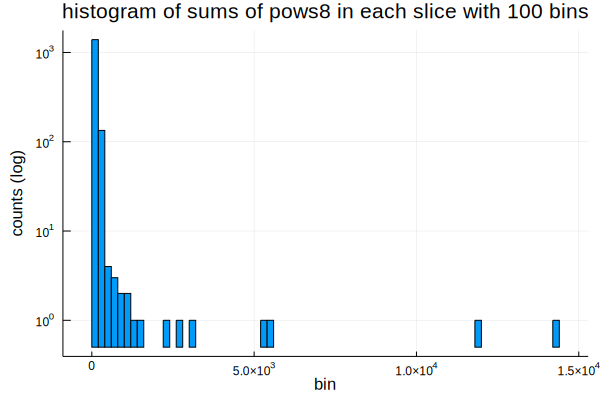

In [11]:
histogram(sums8,bins=100,yaxis=:log,title="histogram of sums of pows8 in each slice with 100 bins",xlabel="bin",ylabel="counts (log)",label="")